In [12]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [13]:
data=pd.read_csv('C:/Users/ADITYA/Downloads/Company_Data.csv')

In [14]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [16]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [17]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [18]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [19]:
A = preprocessing.LabelEncoder()

In [20]:
for i in data.columns:
    print(i)
    if data[i].dtypes == object:
        data[i] = A.fit_transform(data[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US


In [21]:
x = data.iloc[:, 1:]
y = data['Sales']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [23]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [24]:
pred = model.predict(x_test)
pred

array([ 6.40428571,  2.54571429,  9.25822222,  5.4032    ,  6.84856061,
        5.4032    , 12.05272727,  6.40428571,  9.25822222,  9.25822222,
        6.84856061,  6.84856061,  9.74541667,  6.84856061,  9.25822222,
        9.74541667,  9.25822222, 12.05272727,  6.84856061,  6.84856061,
        9.74541667,  6.84856061,  5.4032    ,  6.84856061,  5.4032    ,
        6.84856061,  6.84856061,  6.40428571,  6.84856061,  6.84856061,
        9.25822222,  9.25822222,  6.84856061,  5.4032    ,  9.25822222,
        6.84856061,  5.4032    ,  6.84856061,  9.25822222,  5.4032    ,
        2.54571429,  6.84856061,  9.74541667, 12.05272727,  9.25822222,
        6.84856061,  6.84856061,  9.74541667,  6.84856061,  6.84856061,
        9.74541667,  6.84856061,  6.84856061,  9.25822222,  6.84856061,
        5.4032    ,  6.84856061,  9.25822222, 12.05272727,  9.25822222,
        9.25822222,  9.25822222,  9.9175    ,  6.84856061,  6.84856061,
        6.84856061,  9.25822222,  6.84856061,  5.4032    ,  9.25

In [25]:
pd.crosstab(y_test,pred)

col_0,2.545714,5.403200,6.404286,6.848561,9.258222,9.745417,9.917500,12.052727
Sales,,,,,,,,
0.91,0,1,0,0,0,0,0,0
2.23,0,1,0,0,0,0,0,0
2.86,1,0,0,0,0,0,0,0
3.02,0,0,1,0,0,0,0,0
3.07,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
13.44,0,0,0,0,1,0,0,0
13.55,0,0,0,0,0,0,0,1
13.91,0,0,0,0,0,0,0,1


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(x_test))

4.016841281436863

In [27]:
label=x_test.columns
label

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

[Text(465.0, 792.75, 'Price <= 94.5\nmse = 7.665\nsamples = 280\nvalue = 7.356'),
 Text(232.5, 566.25, 'ShelveLoc <= 0.5\nmse = 5.765\nsamples = 46\nvalue = 9.804'),
 Text(116.25, 339.75, 'CompPrice <= 118.5\nmse = 5.553\nsamples = 11\nvalue = 7.682'),
 Text(58.125, 113.25, 'mse = 2.686\nsamples = 7\nvalue = 6.404'),
 Text(174.375, 113.25, 'mse = 2.717\nsamples = 4\nvalue = 9.918'),
 Text(348.75, 339.75, 'ShelveLoc <= 1.5\nmse = 3.971\nsamples = 35\nvalue = 10.471'),
 Text(290.625, 113.25, 'mse = 2.533\nsamples = 11\nvalue = 12.053'),
 Text(406.875, 113.25, 'mse = 2.957\nsamples = 24\nvalue = 9.745'),
 Text(697.5, 566.25, 'ShelveLoc <= 0.5\nmse = 6.629\nsamples = 234\nvalue = 6.874'),
 Text(581.25, 339.75, 'Price <= 143.5\nmse = 4.085\nsamples = 57\nvalue = 5.052'),
 Text(523.125, 113.25, 'mse = 3.235\nsamples = 50\nvalue = 5.403'),
 Text(639.375, 113.25, 'mse = 2.993\nsamples = 7\nvalue = 2.546'),
 Text(813.75, 339.75, 'ShelveLoc <= 1.5\nmse = 6.035\nsamples = 177\nvalue = 7.461'),
 T

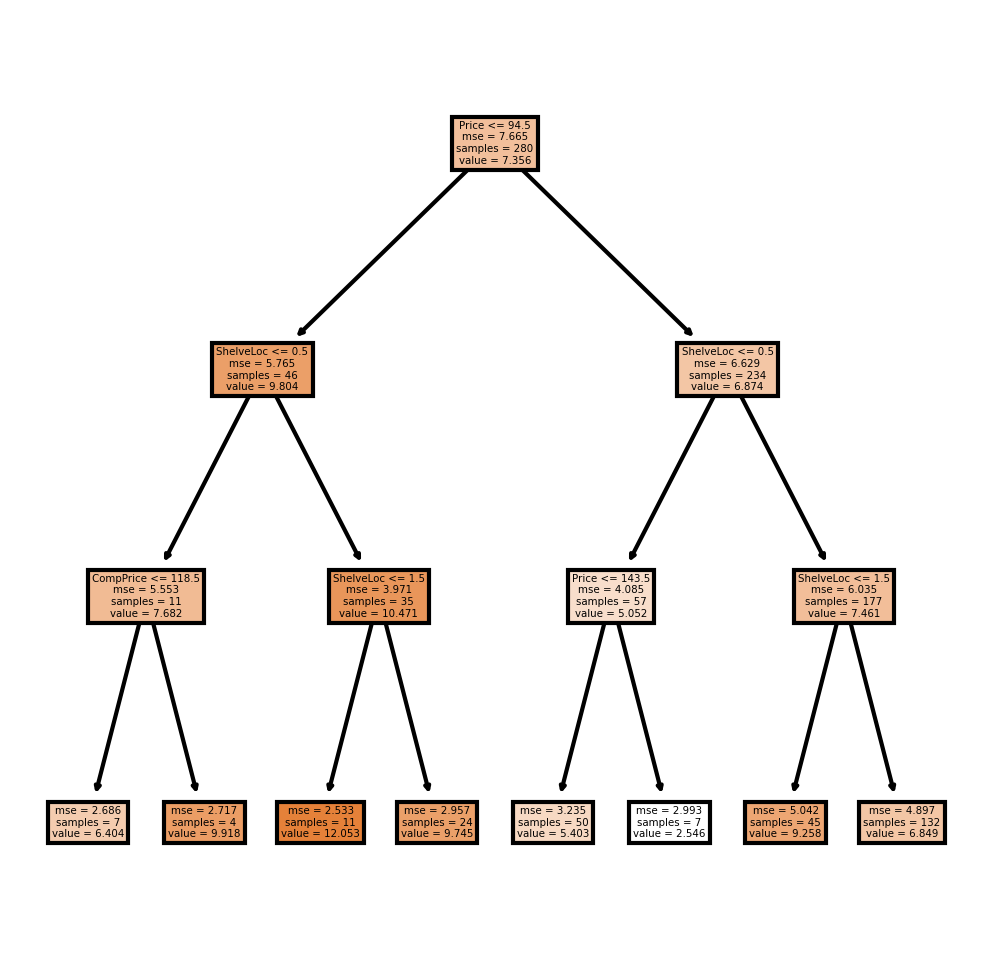

In [28]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['Sales']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names= fn, class_names=cn, filled=True)

In [29]:
model.score(x_test,y_test) 

0.5263023772875564

In [30]:
x1 = data.iloc[:, 0:10]
y1 = data.iloc[:,10]

In [31]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size= 0.3, random_state=42)
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model1.fit(x_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [32]:
predict = model1.predict(x_test1)
predict

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1,predict))

[[31  5]
 [ 7 77]]


[Text(983.6538461538461, 1981.875, 'Advertising <= 0.5\nentropy = 0.957\nsamples = 280\nvalue = [106, 174]\nclass = High'),
 Text(357.6923076923077, 1415.625, 'Income <= 36.0\nentropy = 0.51\nsamples = 106\nvalue = [94, 12]\nclass = Low'),
 Text(178.84615384615384, 849.375, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = Low'),
 Text(536.5384615384615, 849.375, 'Age <= 76.5\nentropy = 0.592\nsamples = 84\nvalue = [72, 12]\nclass = Low'),
 Text(357.6923076923077, 283.125, 'entropy = 0.49\nsamples = 75\nvalue = [67, 8]\nclass = Low'),
 Text(715.3846153846154, 283.125, 'entropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = Low'),
 Text(1609.6153846153845, 1415.625, 'Advertising <= 4.5\nentropy = 0.362\nsamples = 174\nvalue = [12, 162]\nclass = High'),
 Text(1251.923076923077, 849.375, 'Population <= 140.5\nentropy = 0.906\nsamples = 28\nvalue = [9, 19]\nclass = High'),
 Text(1073.076923076923, 283.125, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = High'),
 Text(1430.76923076

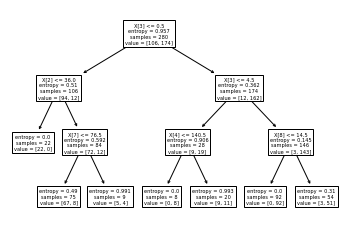

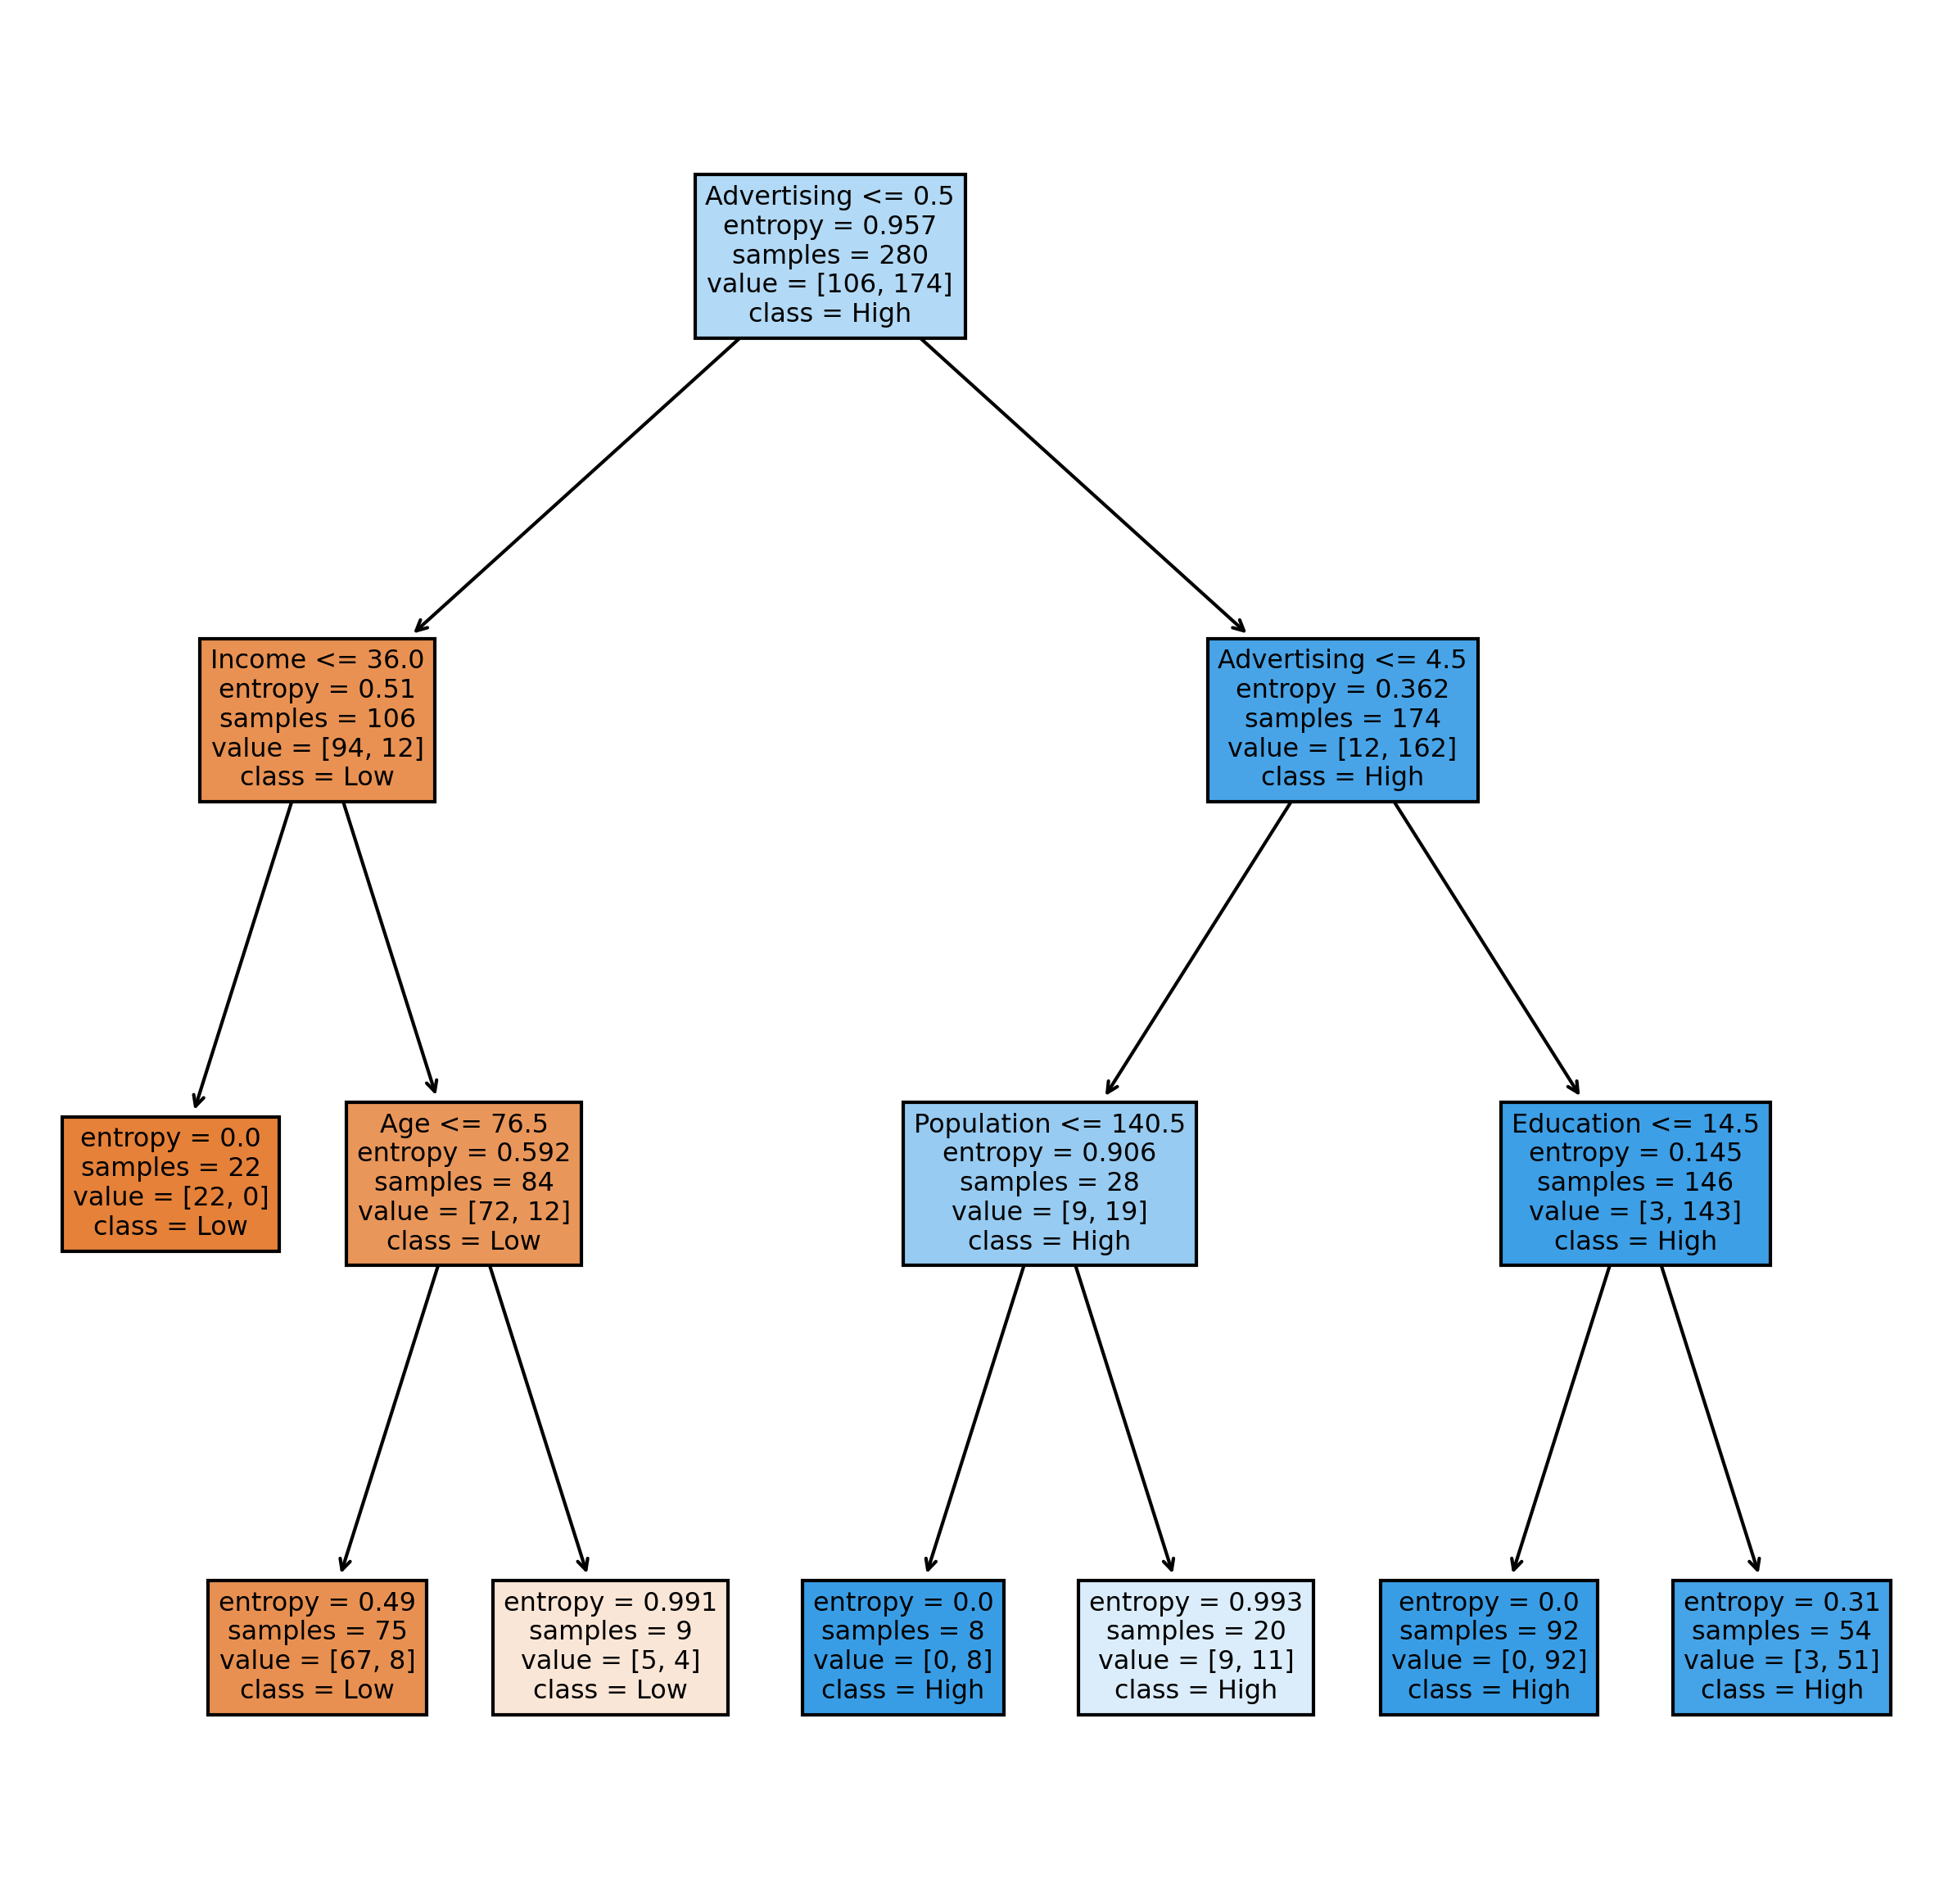

In [35]:
tree.plot_tree(model1)
fn = data.columns
cn = ['Low', 'High']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,10), dpi=300)
tree.plot_tree(model1, feature_names=fn, class_names=cn, filled=True)

In [37]:
np.mean(predict==y_test1)

0.9